In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import transforms,models,datasets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch import optim
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import cv2, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

print(device)

cpu


In [3]:
import pandas as pd
import os

train_df = pd.DataFrame(columns=["img_name","label"])
img_name = os.listdir("Train/Astin")
lastIndex1 = len(img_name)
img_name += os.listdir("Train/Casiraghi")
lastIndex2 = len(img_name) 
#img_name += os.listdir("Train/Clinton")   

train_df["img_name"] = img_name

for idx, i in enumerate(img_name[:lastIndex1]):
    train_df["img_name"][idx] = "Astin/" + train_df["img_name"][idx]
    train_df["label"][idx] = 0

for idx, i in enumerate(img_name[lastIndex1:lastIndex2], start=lastIndex1):
    train_df["img_name"][idx] = "Casiraghi/" + train_df["img_name"][idx]
    train_df["label"][idx] = 1
                            
#for idx, i in enumerate(img_name[lastIndex2:], start=lastIndex2):
#    train_df["img_name"][idx] = "Clinton/" + train_df["img_name"][idx]
#    train_df["label"][idx] = 2

display(train_df)
train_df.to_csv (r'train_csv.csv', index = False, header=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_6388\184263442.py:14: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df["img_name"][idx] = "Astin/" + train_df["img_name"][idx]
C:\Users\alexa\AppData\Local\Temp\ipykernel_6388\184263442.py:15

,img_name,label
0,Astin/John_Astin_0001.jpg,0
1,Astin/John_Astin_0002.jpg,0
2,Astin/John_Astin_0003.jpg,0
3,Astin/John_Astin_0004.jpg,0
4,Astin/John_Astin_0005.jpg,0
...,...,...
119,Casiraghi/Caroline_Princess_of_Hanover_0031.jpg,1
120,Casiraghi/Caroline_Princess_of_Hanover_0032.jpg,1
121,Casiraghi/Stefano_Casiraghi_0001.jpg,1
122,Casiraghi/Stefano_Casiraghi_0002.jpg,1


In [4]:
test_df = pd.DataFrame(columns=["img_name","label"])
img_name = os.listdir("Test/Sean_Astin")
lastIndex1 = len(img_name)
img_name += os.listdir("Test/Charlotte_Casiraghi")
lastIndex2 = len(img_name) 
#img_name += os.listdir("Test/Chelsea_Clinton")   

test_df["img_name"] = img_name

for idx, i in enumerate(img_name[:lastIndex1]):
    test_df["img_name"][idx] = "Sean_Astin/" + test_df["img_name"][idx]
    test_df["label"][idx] = 0

for idx, i in enumerate(img_name[lastIndex1:lastIndex2], start=lastIndex1):
    test_df["img_name"][idx] = "Charlotte_Casiraghi/" + test_df["img_name"][idx]
    test_df["label"][idx] = 1
                            
# for idx, i in enumerate(img_name[lastIndex2:], start=lastIndex2):
#     train_df["img_name"][idx] = "Clinton/" + train_df["img_name"][idx]
#     train_df["label"][idx] = 2

display(train_df)
test_df.to_csv (r'test_csv.csv', index = False, header=True)

C:\Users\alexa\AppData\Local\Temp\ipykernel_6388\1201189283.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_df["img_name"][idx] = "Sean_Astin/" + test_df["img_name"][idx]
C:\Users\alexa\AppData\Local\Temp\ipykernel_6388\1201189283.

,img_name,label
0,Astin/John_Astin_0001.jpg,0
1,Astin/John_Astin_0002.jpg,0
2,Astin/John_Astin_0003.jpg,0
3,Astin/John_Astin_0004.jpg,0
4,Astin/John_Astin_0005.jpg,0
...,...,...
119,Casiraghi/Caroline_Princess_of_Hanover_0031.jpg,1
120,Casiraghi/Caroline_Princess_of_Hanover_0032.jpg,1
121,Casiraghi/Stefano_Casiraghi_0001.jpg,1
122,Casiraghi/Stefano_Casiraghi_0002.jpg,1


In [5]:
from torch.utils.data import Dataset
import pandas as pd
import os
from PIL import Image
import torch

class FamiliesDataset(Dataset):
    def __init__(self, root_dir, annotation_file, train=False, transform=None):
        self.root_dir = root_dir
        self.train = train
        self.annotations = pd.read_csv(annotation_file)
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_id = self.annotations.iloc[index, 0]
        img = Image.open(os.path.join(self.root_dir, img_id)).convert('RGB')
        y_label = torch.tensor(self.annotations.iloc[index, 1])

        if self.transform is not None:
            img = self.transform(img)

        return img, torch.unsqueeze(y_label, 0)

In [6]:
from torch.utils.data import DataLoader
transform = transforms.Compose(
    [
     transforms.Resize([224,224]),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])


train_set = FamiliesDataset("Train","train_csv.csv", transform=transform)
train_loader = DataLoader(dataset=train_set, shuffle=True, batch_size=4, num_workers=0, drop_last = True)

test_set = FamiliesDataset("Test","test_csv.csv", train=False, transform=transform)
test_loader = DataLoader(dataset=test_set, shuffle=False, batch_size=4, num_workers=0, drop_last = True)

#classes = ('Astin', 'Casiraghi', 'Clinton')
classes = ('Astin', 'Casiraghi')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


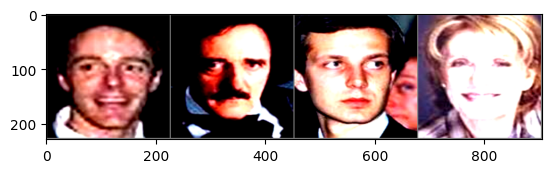

Astin Astin Casiraghi Astin


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [8]:
#from torchvision import models
#import torch.nn as nn
# from torch import optim
# 
# model = models.resnet18(pretrained=True)
# num_features = model.fc.in_features 
# 
# # Add a fully-connected layer for classification
# model.fc = nn.Linear(num_features, 3)
# model = model.to(device)
# 
# # Define loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
# 
# # Set the random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

In [33]:
def get_model():
    model = models.resnet18(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 1),
    nn.Sigmoid())
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)
    return model.to(device), loss_fn, optimizer

In [34]:
!pip install torch_summary
from torchsummary import summary
model, criterion, optimizer = get_model()
summary(model, torch.zeros(1,3,224,224))


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\alexa\Desktop\DeepLearning\labs\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\alexa\Desktop\DeepLearning\labs\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 112, 112]        (9,408)
├─BatchNorm2d: 1-2                       [-1, 64, 112, 112]        (128)
├─ReLU: 1-3                              [-1, 64, 112, 112]        --
├─MaxPool2d: 1-4                         [-1, 64, 56, 56]          --
├─Sequential: 1-5                        [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-1                   [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-1                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-2             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-3                    [-1, 64, 56, 56]          --
|    |    └─Conv2d: 3-4                  [-1, 64, 56, 56]          (36,864)
|    |    └─BatchNorm2d: 3-5             [-1, 64, 56, 56]          (128)
|    |    └─ReLU: 3-6                    [-1, 64, 56, 56]          --
|    └─BasicBlock: 2-2                   [-1, 64, 56, 56]  

In [35]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    prediction = prediction.float()
    y = y.float()
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [36]:
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    is_correct = (prediction > 0.5) == y
    return is_correct.cpu().numpy().tolist()

In [37]:
model, loss_fn, optimizer = get_model()

In [38]:
train_losses, train_accuracies = [], []
val_accuracies = []

print("All losses and accuracies are for each epoch")
for epoch in range(10):
    
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []

    for ix, batch in enumerate(iter(train_loader)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(train_loader)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(test_loader)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
    val_epoch_accuracy = np.mean(val_epoch_accuracies)

    print(f" epoch {epoch + 1}/10, Training Loss: {train_epoch_loss}, Training Accuracy: {train_epoch_accuracy}, Validation Accuracy: {val_epoch_accuracy}")
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)
epochs = np.arange(5)+1


All losses and accuracies are for each epoch
 epoch 1/10, Training Loss: 0.714369164359185, Training Accuracy: 0.8064516129032258, Validation Accuracy: 0.8076923076923077
 epoch 2/10, Training Loss: 0.5960696570334896, Training Accuracy: 0.7983870967741935, Validation Accuracy: 0.7307692307692307
 epoch 3/10, Training Loss: 0.5983237451122653, Training Accuracy: 0.8064516129032258, Validation Accuracy: 0.7307692307692307
 epoch 4/10, Training Loss: 0.601222671808735, Training Accuracy: 0.7580645161290323, Validation Accuracy: 0.6538461538461539
 epoch 5/10, Training Loss: 0.5762759235597426, Training Accuracy: 0.5645161290322581, Validation Accuracy: 0.4807692307692308
 epoch 6/10, Training Loss: 0.5069393563655115, Training Accuracy: 0.9193548387096774, Validation Accuracy: 0.8846153846153846
 epoch 7/10, Training Loss: 0.453447550535202, Training Accuracy: 0.8790322580645161, Validation Accuracy: 0.7692307692307693
 epoch 8/10, Training Loss: 0.39765624774079167, Training Accuracy: 0